In [ ]:
!pip install numpy
!pip install -U scikit-fuzzy
!pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7d8965a8997e3a9abac8ea7f7f35a41b229f99737555f41f720b25baefbbb1fa
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


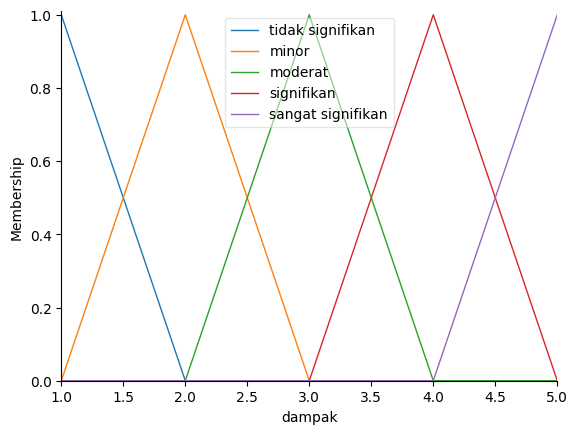

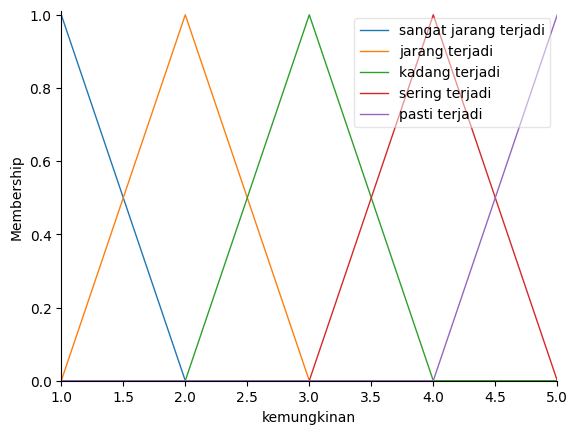

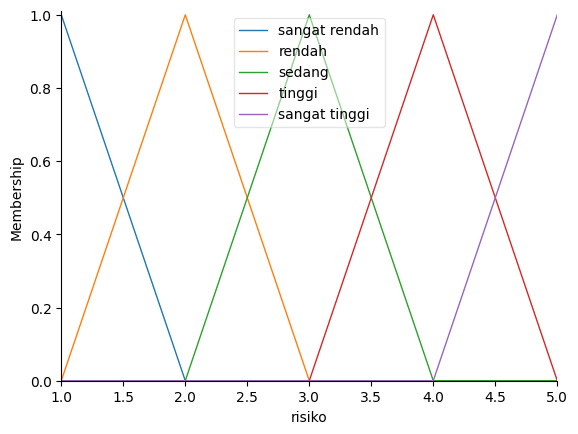

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Linguistic variables for antecedents/consequent
dampak = ctrl.Antecedent(np.arange(1, 6, 1), 'dampak')
kemungkinan = ctrl.Antecedent(np.arange(1, 6, 1), 'kemungkinan')
risiko = ctrl.Consequent(np.arange(1, 6, 1), 'risiko')

# membership functions for each linguistic values
dampak['tidak signifikan'] = fuzz.trimf(dampak.universe, [1, 1, 2])
dampak['minor'] = fuzz.trimf(dampak.universe, [1, 2, 3])
dampak['moderat'] = fuzz.trimf(dampak.universe, [2, 3, 4])
dampak['signifikan'] = fuzz.trimf(dampak.universe, [3, 4, 5])
dampak['sangat signifikan'] = fuzz.trimf(dampak.universe, [4, 5, 5])

kemungkinan['sangat jarang terjadi'] = fuzz.trimf(kemungkinan.universe, [1, 1, 2])
kemungkinan['jarang terjadi'] = fuzz.trimf(kemungkinan.universe, [1, 2, 3])
kemungkinan['kadang terjadi'] = fuzz.trimf(kemungkinan.universe, [2, 3, 4])
kemungkinan['sering terjadi'] = fuzz.trimf(kemungkinan.universe, [3, 4, 5])
kemungkinan['pasti terjadi'] = fuzz.trimf(kemungkinan.universe, [4, 5, 5])

risiko['sangat rendah'] = fuzz.trimf(risiko.universe, [1, 1, 2])
risiko['rendah'] = fuzz.trimf(risiko.universe, [1, 2, 3])
risiko['sedang'] = fuzz.trimf(risiko.universe, [2, 3, 4])
risiko['tinggi'] = fuzz.trimf(risiko.universe, [3, 4, 5])
risiko['sangat tinggi'] = fuzz.trimf(risiko.universe, [4, 5, 5])

dampak.view()
kemungkinan.view()
risiko.view()




In [ ]:
# Define the rules
rule1 = ctrl.Rule(dampak['sangat signifikan'] & kemungkinan['pasti terjadi'], risiko['sangat tinggi'])
rule2 = ctrl.Rule(dampak['sangat signifikan'] & kemungkinan['sering terjadi'], risiko['sangat tinggi'])
rule3 = ctrl.Rule(dampak['signifikan'] & kemungkinan['pasti terjadi'], risiko['sangat tinggi'])
rule4 = ctrl.Rule(dampak['sangat signifikan'] & kemungkinan['kadang terjadi'], risiko['tinggi'])
rule5 = ctrl.Rule(dampak['signifikan'] & kemungkinan['sering terjadi'], risiko['tinggi'])
rule6 = ctrl.Rule(dampak['signifikan'] & kemungkinan['kadang terjadi'], risiko['tinggi'])
rule7 = ctrl.Rule(dampak['moderat'] & kemungkinan['pasti terjadi'], risiko['tinggi'])
rule8 = ctrl.Rule(dampak['moderat'] & kemungkinan['sering terjadi'], risiko['tinggi'])
rule9 = ctrl.Rule(dampak['sangat signifikan'] & kemungkinan['jarang terjadi'], risiko['sedang'])
rule10 = ctrl.Rule(dampak['sangat signifikan'] & kemungkinan['sangat jarang terjadi'], risiko['sedang'])
rule11 = ctrl.Rule(dampak['signifikan'] & kemungkinan['jarang terjadi'], risiko['sedang'])
rule12 = ctrl.Rule(dampak['moderat'] & kemungkinan['kadang terjadi'], risiko['sedang'])
rule13 = ctrl.Rule(dampak['moderat'] & kemungkinan['jarang terjadi'], risiko['sedang'])
rule14 = ctrl.Rule(dampak['minor'] & kemungkinan['pasti terjadi'], risiko['sedang'])
rule15 = ctrl.Rule(dampak['minor'] & kemungkinan['sering terjadi'], risiko['sedang'])
rule16 = ctrl.Rule(dampak['minor'] & kemungkinan['kadang terjadi'], risiko['sedang'])
rule17 = ctrl.Rule(dampak['tidak signifikan'] & kemungkinan['pasti terjadi'], risiko['sedang'])
rule18 = ctrl.Rule(dampak['signifikan'] & kemungkinan['sangat jarang terjadi'], risiko['rendah'])
rule19 = ctrl.Rule(dampak['moderat'] & kemungkinan['sangat jarang terjadi'], risiko['rendah'])
rule20 = ctrl.Rule(dampak['minor'] & kemungkinan['jarang terjadi'], risiko['rendah'])
rule21 = ctrl.Rule(dampak['tidak signifikan'] & kemungkinan['sering terjadi'], risiko['rendah'])
rule22 = ctrl.Rule(dampak['tidak signifikan'] & kemungkinan['kadang terjadi'], risiko['rendah'])
rule23 = ctrl.Rule(dampak['minor'] & kemungkinan['sangat jarang terjadi'], risiko['sangat rendah'])
rule24 = ctrl.Rule(dampak['tidak signifikan'] & kemungkinan['jarang terjadi'], risiko['sangat rendah'])
rule25 = ctrl.Rule(dampak['tidak signifikan'] & kemungkinan['sangat jarang terjadi'], risiko['sangat rendah'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 4.0 %


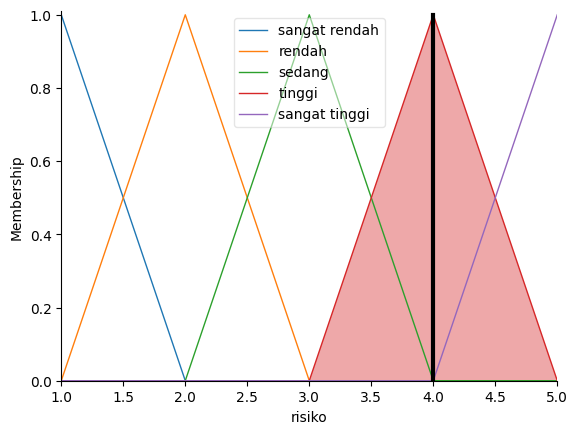

In [ ]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dampak': 3, 'kemungkinan': 5})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risiko'], "%")
risiko.view(sim=ctrl_sim)
